# Assignment 1 - Penalized Regression

## **Questions to answer:**

* What is your name? Include all team members if submitting as a group.

Archit Dudeja

Shreeja Kapoor

* From what perspective are you conducting the analysis? (Who are you? / Who are you working for?)

We are working for a wine company to model wine (Portuguese "Vinho Verde" wine) quality based on physicochemical tests without including grape types, wine brands, wine selling prices, etc., which could change a sensory or person's rating.

* What is your question?

We are trying to see if physicochemical tests can help identify the wine's quality. Also, we need to find out if all input variables are relevant. It could be interesting to test feature selection methods. We are trying to see if the non-human features can help predict a wine's quality.

* Describe your dataset(s), including URL (if available).

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal.
URL : https://archive.ics.uci.edu/dataset/186/wine+quality

* What is(are) your independent variable(s) and dependent variable(s)? Include variable type (binary, categorical, numeric).

The Wine Quality dataset consists of 11 independent variables related to the physicochemical properties of the wine and one dependent variable representing the quality score. We created another independent variable named "color" when joining the two datasets.

**Independent Variables (features):**

fixed acidity (numeric)
volatile acidity (numeric)
citric acid (numeric)
residual sugar (numeric)
chlorides (numeric)
free sulfur dioxide (numeric)
total sulfur dioxide (numeric)
density (numeric)
pH (numeric)
sulphates (numeric)
alcohol (numeric)
colour (object)

**Dependent Variable (target):**

quality (numeric): This is the quality rating of the wine on a scale from 0 to 10


* How are your variables suitable for your analysis method?

The variables are all numeric, which is ideal for techniques like penalized regression (Lasso or Ridge), since there can be colinearity between predictors which it can penalize

There is only 1 categorical variable ( colour) so dummy encoding does not increase the number of features or columns excessively.

The dependent variable quality is suitable for regression analysis, where we predict a continuous output. We tested the data to ensure there was no multicollinearity, autocorrelation, or homoskedasticity.

* What are your conclusions (include references to one or two CLEARLY INDICATED AND IMPORTANT graphs or tables in your output)?

After performing regression analysis, we can assess which variables (independent variables) are significant predictors of wine quality. We could conclude that 'alcohol' was the strongest predictor with 'volatile acidity' and 'chlorides' being the next two important predictors. Even though alcohol had high colinearity with other predictors in the beginning.
We understand that alcohol's multicollinearity could be due to pH and sulphide's dependence on it. Therefore, we can remove sulphide and pH without significantly affecting the model, but removing the models reduces the R2 significantly.

The First graph where we model using standardized predictors has the highest R2 and lowest MAE.

* What are your assumptions and limitations? Did you include any robustness checks?

We created a function to check for robustness. We analyzed 3 models to look into their metrics values like R2, MAE , MASE, RMSE. We used 20 iterations for the robustness check and looked into the mean and STD values.

**Assumptions**
The relationship between wine properties and quality is assumed to be linear. The physicochemical tests are the only tests conducted on the data and we are trying to see if they are enough to predict the quality.

**Limitations**
The subjectivity of wine quality scores: Quality ratings are subjective and may vary across tasters or institutions hence we would require more data and subjective predictors to find the right quality of a wine. The model is limited with many omitted variables as a source of bias and we used robustness checks on multiple models with different predictors.

We also modeled with each predictor to see if a predictor is highly correlated.

We have created multiple models by adding different groups of predictors to see if the MAE decreases and R-square increases.

We have tried to add comments and assessments wherever we found them necessary. We have standaridized the predicotrs so they are no biases.

## Loading Packages and Data

In [72]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
import statsmodels.api as sm
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset directly from a GitHub repository
red = 'https://raw.githubusercontent.com/ADudejaa/MachineLearning/refs/heads/main/winequality-red.csv' # Replace with actual GitHub link
df1 = pd.read_csv(red, sep=';')
df1['colour']='red'

white = 'https://raw.githubusercontent.com/ADudejaa/MachineLearning/refs/heads/main/winequality-white.csv' # Replace with actual GitHub link
df2 = pd.read_csv(red, sep=';')
df2['colour']='white'

df = pd.concat([df1, df2], axis=0)
display(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,white
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,white
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,white
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,white


## Exploratory Data Analysis (EDA)

In [73]:
# Summary of the data
print("Data Summary:")
print(df.info())

print("\nStatistical Description:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Data Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 3198 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3198 non-null   float64
 1   volatile acidity      3198 non-null   float64
 2   citric acid           3198 non-null   float64
 3   residual sugar        3198 non-null   float64
 4   chlorides             3198 non-null   float64
 5   free sulfur dioxide   3198 non-null   float64
 6   total sulfur dioxide  3198 non-null   float64
 7   density               3198 non-null   float64
 8   pH                    3198 non-null   float64
 9   sulphates             3198 non-null   float64
 10  alcohol               3198 non-null   float64
 11  quality               3198 non-null   int64  
 12  colour                3198 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 349.8+ KB
None

Statistical Description:
        fixed acidity  

## Dummy Encoding & Corr Plot

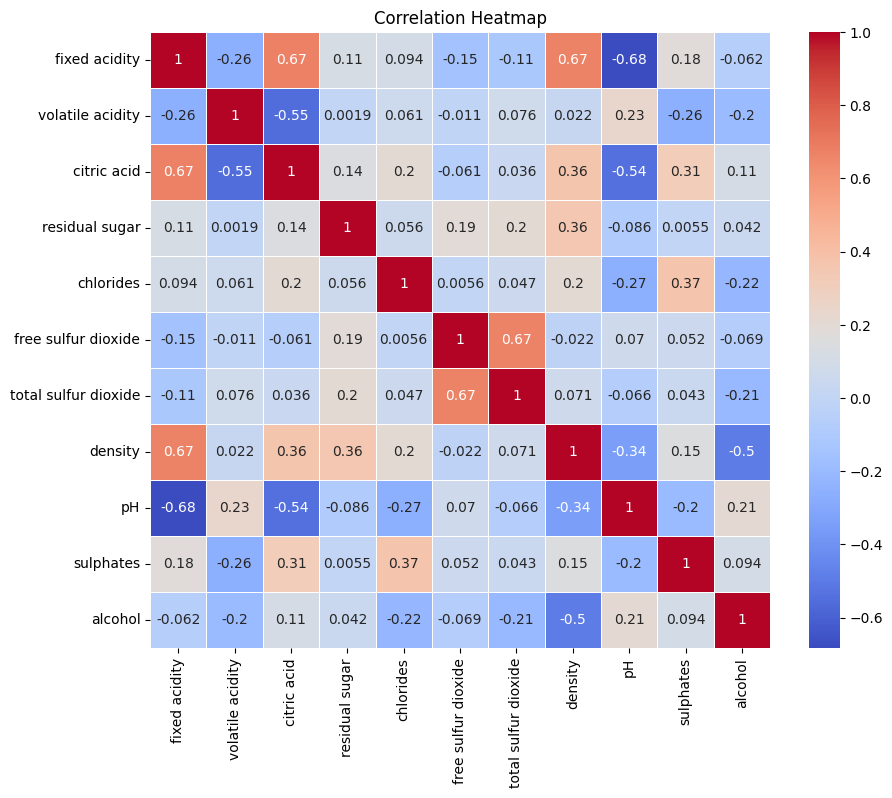

In [74]:
# Popping Target variable
df_encoded = pd.get_dummies(df, drop_first=True)
y= df_encoded.pop('quality')

# Correlation heatmap of numerical features
numerical_features = df_encoded.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Durbin-Watson statistic: 0.0049259028839184526
Breusch-Pagan test LM-statistic: 3188.466845168286, p-value: 0.0
Breusch-Pagan test F-statistic: 88771.4777280729, p-value: 0.0


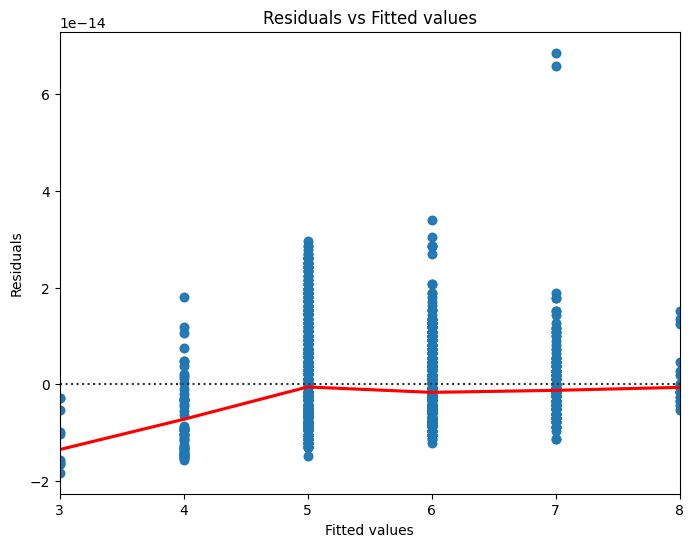

In [75]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from sklearn.linear_model import LinearRegression

df_t=df.drop(columns=['colour'])
# Add constant for statsmodels regression
X_with_const = sm.add_constant(df_t)

model = sm.OLS(y, X_with_const).fit()

# Perform the Durbin-Watson test
dw_stat = durbin_watson(model.resid)
print(f"Durbin-Watson statistic: {dw_stat}")

### 3. Homoskedasticity Test (Breusch-Pagan)
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(model.resid, X_with_const)
print(f"Breusch-Pagan test LM-statistic: {lm}, p-value: {lm_pvalue}")
print(f"Breusch-Pagan test F-statistic: {fvalue}, p-value: {f_pvalue}")

### Plotting Residuals vs. Fitted Values (for visualizing heteroskedasticity)
plt.figure(figsize=(8,6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

As we remove "colour" ( categorical) , density, pH, alcohol and fixed acidity, we see an increase in our autocorrelation to show that there is minimal autocorrelation between predictors.

Durbin-Watson statistic: 1.3228822595616831
Breusch-Pagan test LM-statistic: 2237.696791611782, p-value: 0.0
Breusch-Pagan test F-statistic: 928.8752508214476, p-value: 0.0


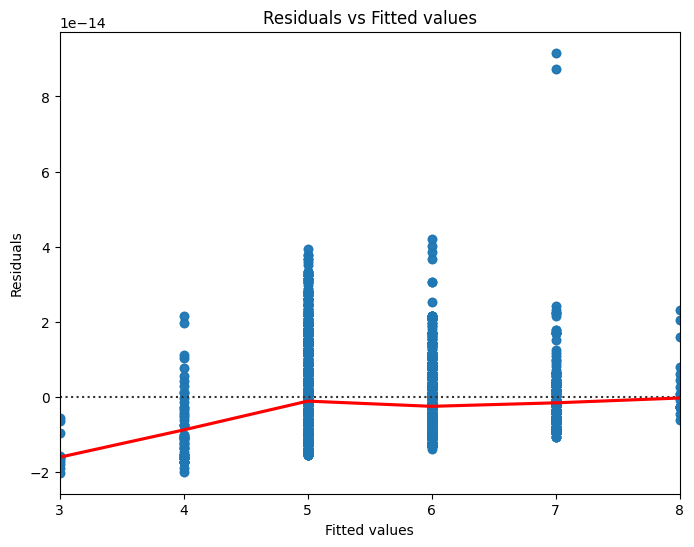

In [76]:
df_l=df.drop(columns=['colour','density','pH','alcohol','fixed acidity'])
X_with_const = sm.add_constant(df_l)

model = sm.OLS(y, X_with_const).fit()

# Perform the Durbin-Watson test
dw_stat = durbin_watson(model.resid)
print(f"Durbin-Watson statistic: {dw_stat}")

### 3. Homoskedasticity Test (Breusch-Pagan)
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(model.resid, X_with_const)
print(f"Breusch-Pagan test LM-statistic: {lm}, p-value: {lm_pvalue}")
print(f"Breusch-Pagan test F-statistic: {fvalue}, p-value: {f_pvalue}")

### Plotting Residuals vs. Fitted Values (for visualizing heteroskedasticity)
plt.figure(figsize=(8,6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

## Function for cross validation and finding best values of alpha

In [77]:
# Function to perform cross-validation, fit models, and evaluate them
def cross_validate_and_fit(X_train, y_train, X_test, y_test, model_type='lasso', alphas=None):
    """
    Function to perform cross-validation, fit Lasso/Ridge models, evaluate metrics and plot top features.

    Parameters:
    X_train (DataFrame): Training features.
    y_train (Series): Training target.
    X_test (DataFrame): Testing features.
    y_test (Series): Testing target.
    model_type (str): 'lasso' for Lasso regression, 'ridge' for Ridge regression.
    alphas (array): Array of alpha values for tuning.

    Returns:
    None: Prints evaluation metrics and plots top features.
    """

    # Define model based on the input type
    if model_type == 'lasso':
        model = Lasso()
        model_name = 'Lasso'
    elif model_type == 'ridge':
        model = Ridge()
        model_name = 'Ridge'
    else:
        raise ValueError("model_type must be either 'lasso' or 'ridge'")

    # Define alpha range if not provided
    if alphas is None:
        alphas = np.logspace(-4, 2, 100)

    # Cross-validation to find the best alpha
    model_cv = GridSearchCV(model, param_grid={'alpha': alphas}, cv=5)
    model_cv.fit(X_train, y_train)
    best_alpha = model_cv.best_params_['alpha']

    # Fit the model with the best alpha
    best_model = model.set_params(alpha=best_alpha)
    best_model.fit(X_train, y_train)

    # Predict on test set
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print evaluation metrics
    print(f'{model_name} - Best Alpha: {best_alpha}')
    print(f'{model_name} - Metrics:')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
    print(f'R² Score: {r2:.4f}')

    # Plot top 5 predictors based on coefficients
    coefs = pd.Series(best_model.coef_, index=cols)
    top_features = coefs.abs().sort_values(ascending=False)
    print("\nLasso Model Coefficients:")
    print(top_features)

    plt.figure(figsize=(8, 6))
    top_features.plot(kind='bar', color='green')
    plt.title(f'Features in {model_name} Model (Alpha={best_alpha})')
    plt.ylabel('Coefficient Value')
    plt.show()

## Modelling without scaling

                 feature          VIF
0          fixed acidity    74.452265
1       volatile acidity    17.060026
2            citric acid     9.183495
3         residual sugar     4.662992
4              chlorides     6.554877
5    free sulfur dioxide     6.442682
6   total sulfur dioxide     6.519699
7                density  1479.287209
8                     pH  1070.967685
9              sulphates    21.590621
10               alcohol   124.394866
Lasso - Best Alpha: 0.00013219411484660288
Lasso - Metrics:
Mean Absolute Error (MAE): 0.5050
Mean Squared Error (MSE): 0.4174
Root Mean Squared Error (RMSE): 0.6460
R² Score: 0.3476

Lasso Model Coefficients:
chlorides               1.883183
volatile acidity        1.102030
sulphates               0.828861
pH                      0.383722
alcohol                 0.303922
citric acid             0.095652
colour_white            0.033840
residual sugar          0.002757
total sulfur dioxide    0.002720
free sulfur dioxide     0.002532
fixe

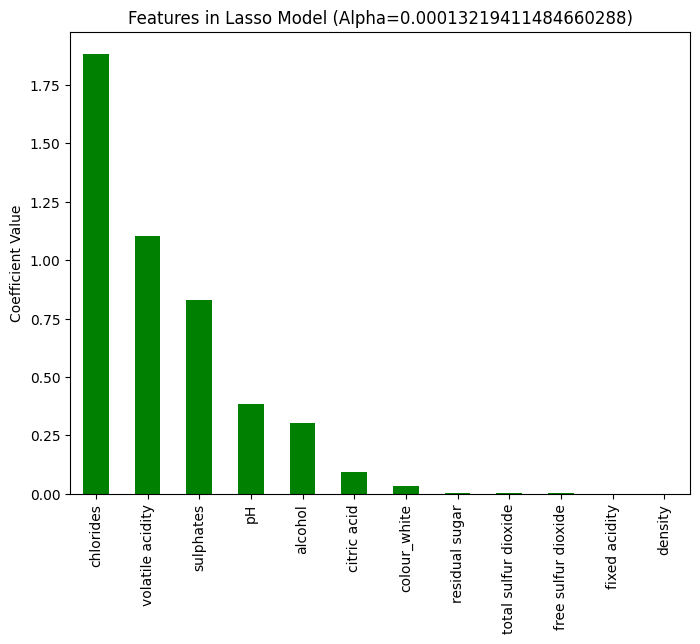

Ridge - Best Alpha: 0.00023101297000831605
Ridge - Metrics:
Mean Absolute Error (MAE): 0.5046
Mean Squared Error (MSE): 0.4172
Root Mean Squared Error (RMSE): 0.6459
R² Score: 0.3479

Lasso Model Coefficients:
density                 18.458503
chlorides                1.927651
volatile acidity         1.092367
sulphates                0.867580
pH                       0.310785
alcohol                  0.286482
citric acid              0.105646
colour_white             0.034168
fixed acidity            0.016159
residual sugar           0.010820
total sulfur dioxide     0.002691
free sulfur dioxide      0.002371
dtype: float64


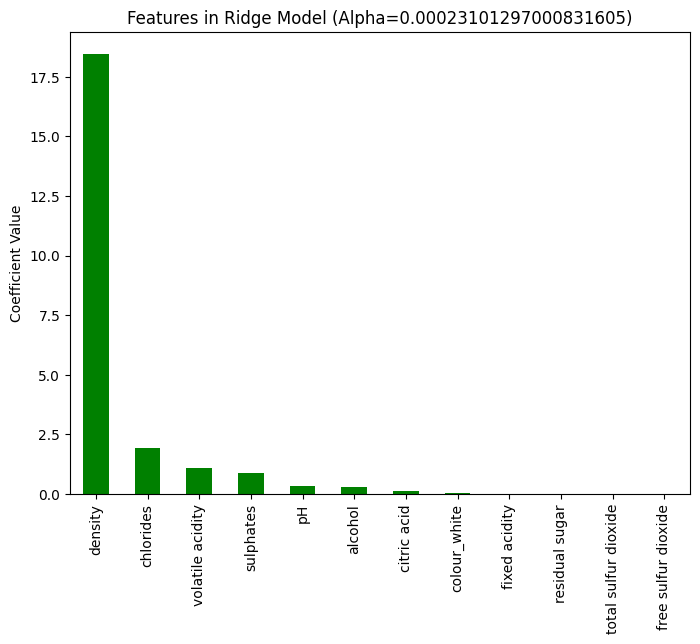

In [78]:
X = numerical_features # VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns # calculating VIF
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

# Define your features (X) and target (Y)
X = df_encoded

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

cols = X_train.columns

# Cross-validate, fit, and evaluate Lasso
cross_validate_and_fit(X_train, y_train, X_test, y_test, model_type='lasso')

# Cross-validate, fit, and evaluate Ridge
cross_validate_and_fit(X_train, y_train, X_test, y_test, model_type='ridge')

Using all the features to see the result of model and top predictors.
Since, Ridge squares the penalty, we can observe that the model is heavily relying on density. We can see from VIF , density has the highest colinearity.
Alogn with that, we have not scaled the data and therefore density is a top predictor

## Modelling Ridge & Lasso

                 feature          VIF
0          fixed acidity    74.452265
1       volatile acidity    17.060026
2            citric acid     9.183495
3         residual sugar     4.662992
4              chlorides     6.554877
5    free sulfur dioxide     6.442682
6   total sulfur dioxide     6.519699
7                density  1479.287209
8                     pH  1070.967685
9              sulphates    21.590621
10               alcohol   124.394866
Lasso - Best Alpha: 0.007564633275546291
Lasso - Metrics:
Mean Absolute Error (MAE): 0.5084
Mean Squared Error (MSE): 0.4210
Root Mean Squared Error (RMSE): 0.6488
R² Score: 0.3420

Lasso Model Coefficients:
alcohol                 0.312367
volatile acidity        0.187653
sulphates               0.134577
chlorides               0.087448
total sulfur dioxide    0.067919
pH                      0.040316
colour_white            0.009321
density                 0.005698
free sulfur dioxide     0.004938
fixed acidity           0.000000
citric

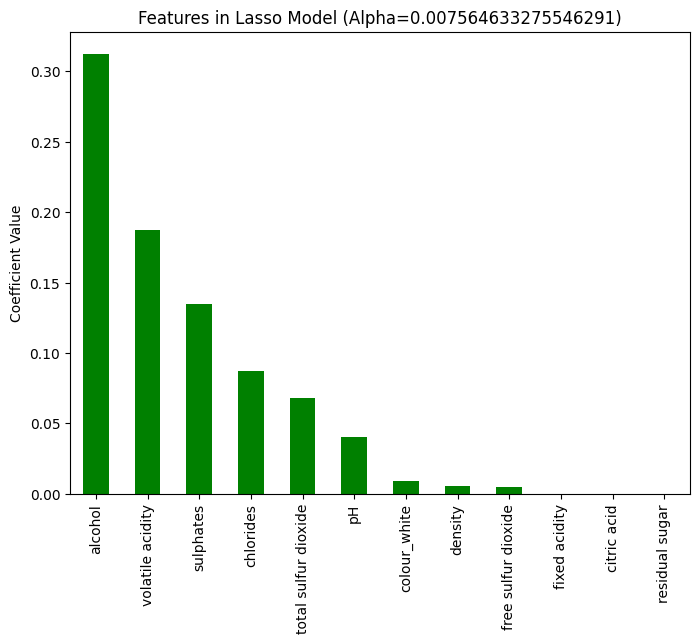

Ridge - Best Alpha: 57.223676593502205
Ridge - Metrics:
Mean Absolute Error (MAE): 0.5052
Mean Squared Error (MSE): 0.4176
Root Mean Squared Error (RMSE): 0.6462
R² Score: 0.3473

Lasso Model Coefficients:
alcohol                 0.286531
volatile acidity        0.185990
sulphates               0.148457
chlorides               0.094893
total sulfur dioxide    0.086407
density                 0.052122
fixed acidity           0.040850
pH                      0.036629
free sulfur dioxide     0.022454
residual sugar          0.019661
colour_white            0.016477
citric acid             0.011778
dtype: float64


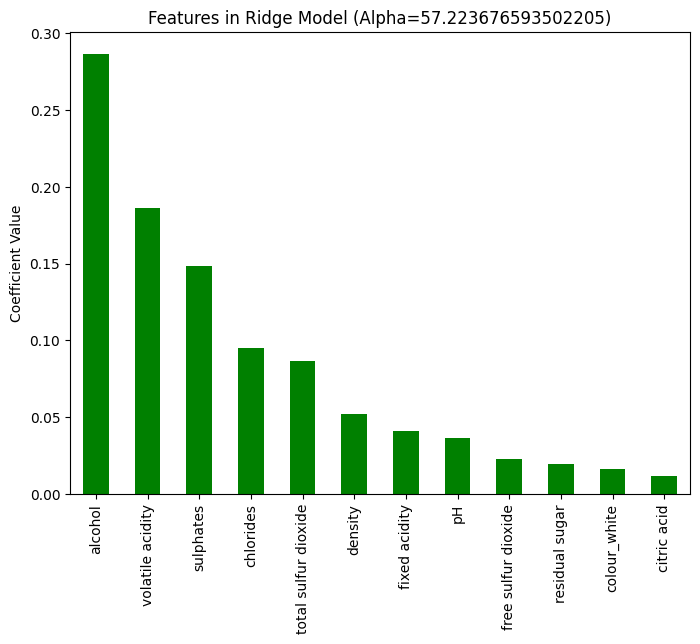

In [79]:
X = numerical_features # VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns # calculating VIF
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

# Define your features (X) and target (Y)
X = df_encoded

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

cols = X_train.columns
# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on the training data and transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Cross-validate, fit, and evaluate Lasso
cross_validate_and_fit(X_train, y_train, X_test, y_test, model_type='lasso')

# Cross-validate, fit, and evaluate Ridge
cross_validate_and_fit(X_train, y_train, X_test, y_test, model_type='ridge')

## Building Models without density

As we remove density, we can see the VIF values decrease substantially.

                feature         VIF
0         fixed acidity   40.216574
1      volatile acidity   17.058940
2           citric acid    9.149028
3        residual sugar    4.662789
4             chlorides    6.017799
5   free sulfur dioxide    6.390157
6  total sulfur dioxide    6.096300
7                    pH  158.025734
8             sulphates   21.552410
9               alcohol  121.980842
Lasso - Best Alpha: 0.006579332246575682
Lasso - Metrics:
Mean Absolute Error (MAE): 0.5078
Mean Squared Error (MSE): 0.4203
Root Mean Squared Error (RMSE): 0.6483
R² Score: 0.3430

Lasso Model Coefficients:
alcohol                 0.315508
volatile acidity        0.187522
sulphates               0.134965
chlorides               0.089060
total sulfur dioxide    0.070813
pH                      0.040924
colour_white            0.010228
free sulfur dioxide     0.008351
fixed acidity           0.000000
citric acid             0.000000
residual sugar          0.000000
dtype: float64


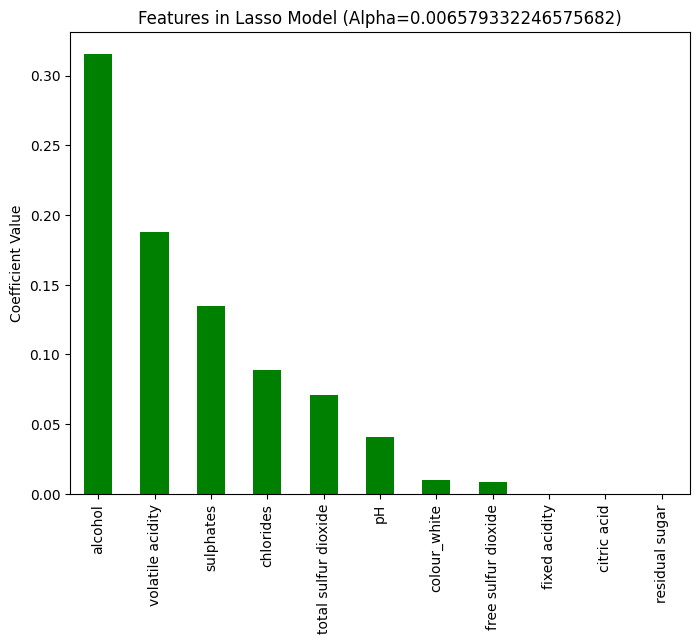

Ridge - Best Alpha: 49.770235643321136
Ridge - Metrics:
Mean Absolute Error (MAE): 0.5056
Mean Squared Error (MSE): 0.4173
Root Mean Squared Error (RMSE): 0.6460
R² Score: 0.3477

Lasso Model Coefficients:
alcohol                 0.314044
volatile acidity        0.190415
sulphates               0.142809
chlorides               0.097423
total sulfur dioxide    0.088083
pH                      0.056535
free sulfur dioxide     0.024889
colour_white            0.016657
citric acid             0.013406
residual sugar          0.004028
fixed acidity           0.001675
dtype: float64


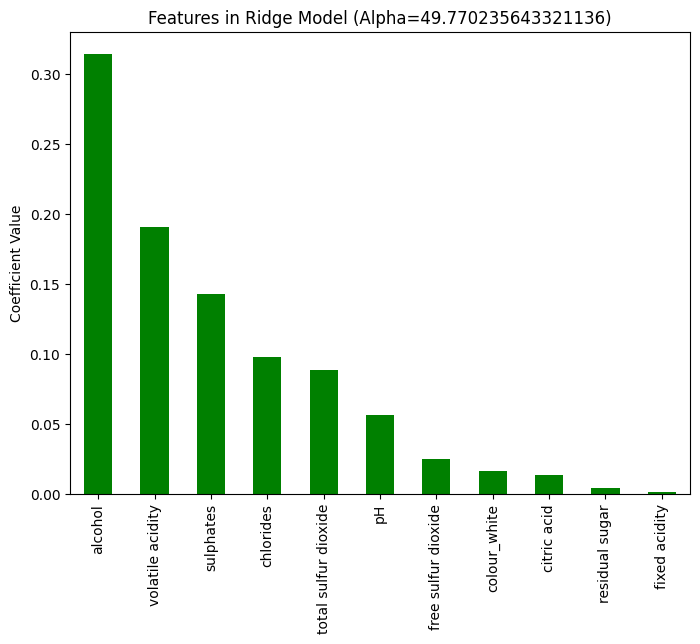

In [80]:
df_a = df_encoded.drop(columns=['density'])

numerical_features = df_a.select_dtypes(include=[np.number])

X = numerical_features # VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns # calculating VIF
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

# Define your features (X) and target (Y)
X = df_a

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

cols = X_train.columns
# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on the training data and transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Cross-validate, fit, and evaluate Lasso
cross_validate_and_fit(X_train, y_train, X_test, y_test, model_type='lasso')

# Cross-validate, fit, and evaluate Ridge
cross_validate_and_fit(X_train, y_train, X_test, y_test, model_type='ridge')

### Model without density, fixed acidity

                feature         VIF
0      volatile acidity   15.358855
1           citric acid    4.952210
2        residual sugar    4.637859
3             chlorides    5.957419
4   free sulfur dioxide    6.388537
5  total sulfur dioxide    5.960105
6                    pH  147.578469
7             sulphates   21.215338
8               alcohol  121.955230
Lasso - Best Alpha: 0.0032745491628777285
Lasso - Metrics:
Mean Absolute Error (MAE): 0.5063
Mean Squared Error (MSE): 0.4187
Root Mean Squared Error (RMSE): 0.6471
R² Score: 0.3456

Lasso Model Coefficients:
alcohol                 0.318477
volatile acidity        0.190421
sulphates               0.140255
chlorides               0.093997
total sulfur dioxide    0.080126
pH                      0.050619
free sulfur dioxide     0.018064
colour_white            0.013659
citric acid             0.008890
residual sugar          0.000000
dtype: float64


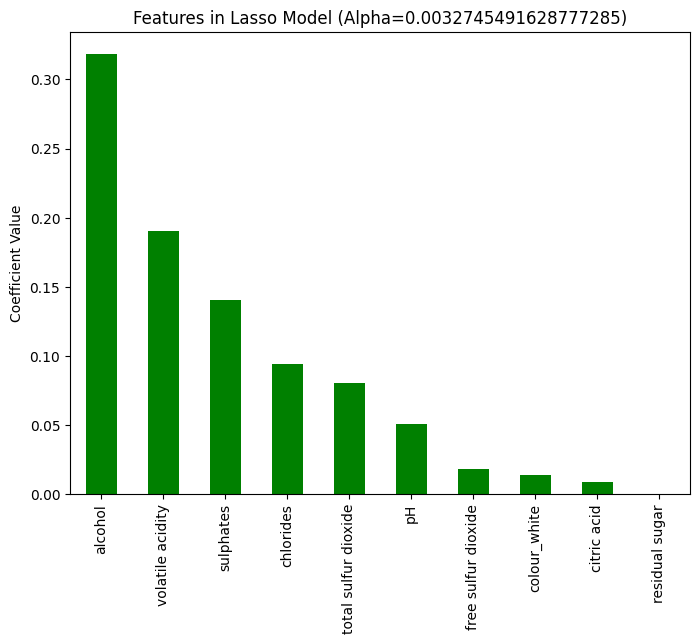

Ridge - Best Alpha: 43.287612810830616
Ridge - Metrics:
Mean Absolute Error (MAE): 0.5055
Mean Squared Error (MSE): 0.4172
Root Mean Squared Error (RMSE): 0.6459
R² Score: 0.3479

Lasso Model Coefficients:
alcohol                 0.315088
volatile acidity        0.191233
sulphates               0.143158
chlorides               0.097293
total sulfur dioxide    0.087912
pH                      0.056444
free sulfur dioxide     0.025045
colour_white            0.016698
citric acid             0.015190
residual sugar          0.003993
dtype: float64


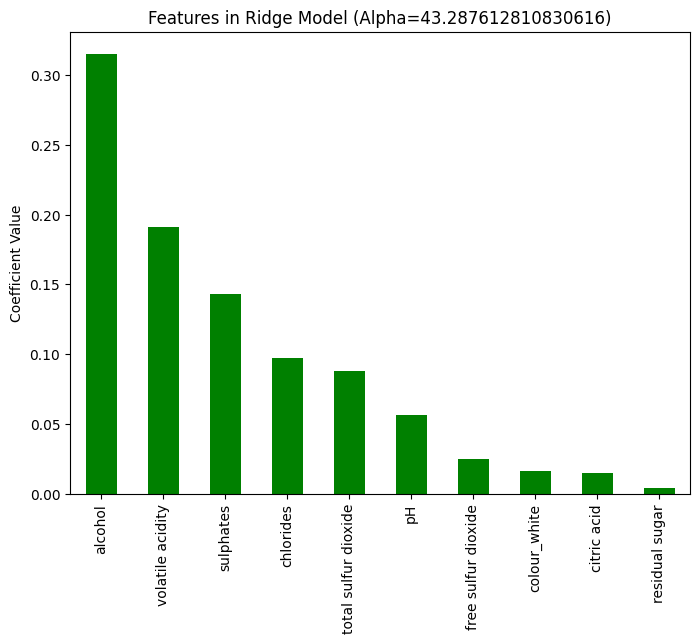

In [81]:
df_aa=df_encoded.drop(columns=['density','fixed acidity'])

numerical_features = df_aa.select_dtypes(include=[np.number])

X = numerical_features # VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns # calculating VIF
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

# Define your features (X) and target (Y)
X = df_aa

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

cols = X_train.columns
# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on the training data and transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Cross-validate, fit, and evaluate Lasso
cross_validate_and_fit(X_train, y_train, X_test, y_test, model_type='lasso')

# Cross-validate, fit, and evaluate Ridge
cross_validate_and_fit(X_train, y_train, X_test, y_test, model_type='ridge')

### Model without 'density','fixed acidity','residual sugar','total sulfur dioxide','free sulfur dioxide

            feature         VIF
0  volatile acidity   14.540253
1       citric acid    4.531944
2         chlorides    5.931765
3                pH  140.178420
4         sulphates   20.973073
5           alcohol  116.061639
Lasso - Best Alpha: 0.0001
Lasso - Metrics:
Mean Absolute Error (MAE): 0.5161
Mean Squared Error (MSE): 0.4276
Root Mean Squared Error (RMSE): 0.6539
R² Score: 0.3317

Lasso Model Coefficients:
alcohol             0.337788
volatile acidity    0.207684
sulphates           0.140865
chlorides           0.091661
pH                  0.058042
citric acid         0.032881
colour_white        0.018288
dtype: float64


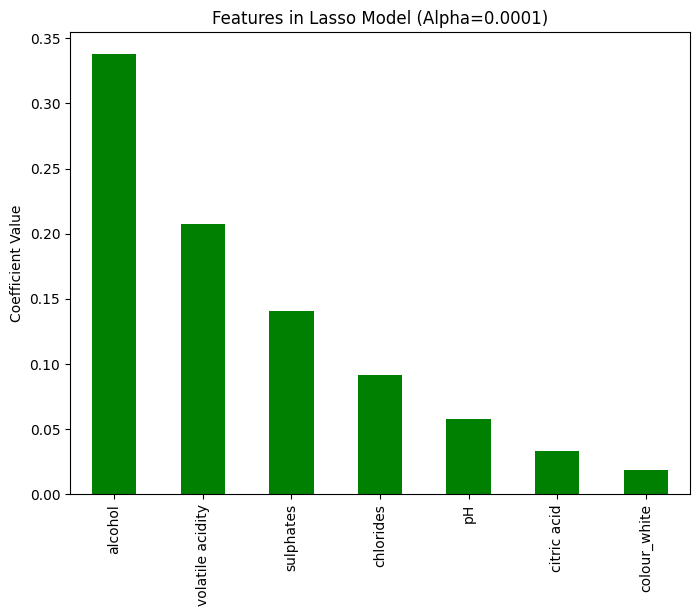

Ridge - Best Alpha: 28.48035868435805
Ridge - Metrics:
Mean Absolute Error (MAE): 0.5165
Mean Squared Error (MSE): 0.4275
Root Mean Squared Error (RMSE): 0.6538
R² Score: 0.3318

Lasso Model Coefficients:
alcohol             0.333333
volatile acidity    0.204735
sulphates           0.139286
chlorides           0.091287
pH                  0.055063
citric acid         0.028364
colour_white        0.018073
dtype: float64


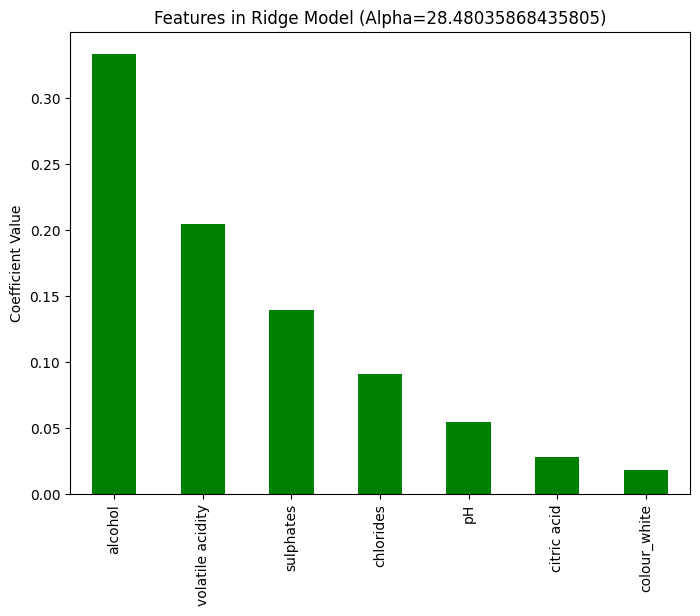

In [82]:
df_ff=df_encoded.drop(columns=['density','fixed acidity','residual sugar','total sulfur dioxide','free sulfur dioxide'])

numerical_features = df_ff.select_dtypes(include=[np.number])

X = numerical_features # VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns # calculating VIF
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

# Define your features (X) and target (Y)
X = df_ff

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
cols = X_train.columns
# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on the training data and transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Cross-validate, fit, and evaluate Lasso
cross_validate_and_fit(X_train, y_train, X_test, y_test, model_type='lasso')

# Cross-validate, fit, and evaluate Ridge
cross_validate_and_fit(X_train, y_train, X_test, y_test, model_type='ridge')

### Removing density, pH, fixed acidity

                feature        VIF
0      volatile acidity  12.880017
1           citric acid   4.913939
2        residual sugar   4.637831
3             chlorides   5.903420
4   free sulfur dioxide   6.349669
5  total sulfur dioxide   5.900754
6             sulphates  20.648712
7               alcohol  31.915246
Lasso - Best Alpha: 0.008697490026177835
Lasso - Metrics:
Mean Absolute Error (MAE): 0.5115
Mean Squared Error (MSE): 0.4273
Root Mean Squared Error (RMSE): 0.6536
R² Score: 0.3322

Lasso Model Coefficients:
alcohol                 0.307317
volatile acidity        0.198281
sulphates               0.134393
chlorides               0.076994
total sulfur dioxide    0.061218
colour_white            0.008807
citric acid             0.000000
residual sugar          0.000000
free sulfur dioxide     0.000000
dtype: float64


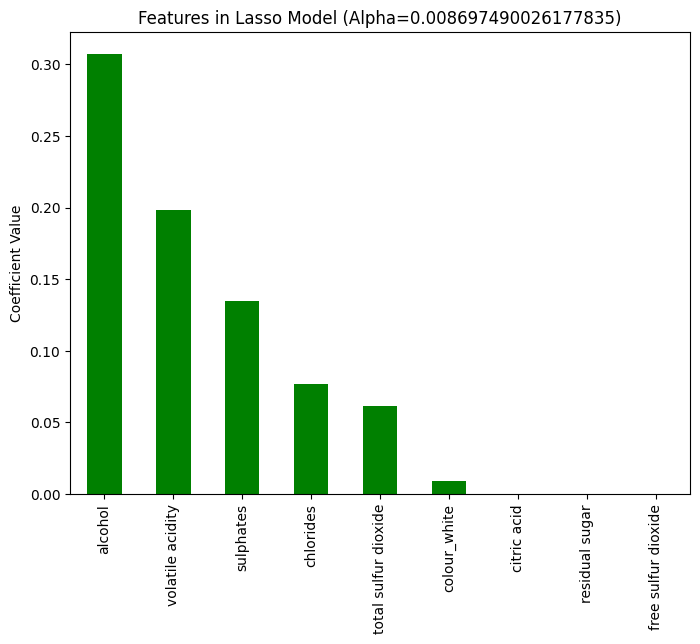

Ridge - Best Alpha: 57.223676593502205
Ridge - Metrics:
Mean Absolute Error (MAE): 0.5090
Mean Squared Error (MSE): 0.4252
Root Mean Squared Error (RMSE): 0.6520
R² Score: 0.3355

Lasso Model Coefficients:
alcohol                 0.300839
volatile acidity        0.190282
sulphates               0.143119
chlorides               0.091457
total sulfur dioxide    0.083173
free sulfur dioxide     0.018584
colour_white            0.016861
citric acid             0.014925
residual sugar          0.004862
dtype: float64


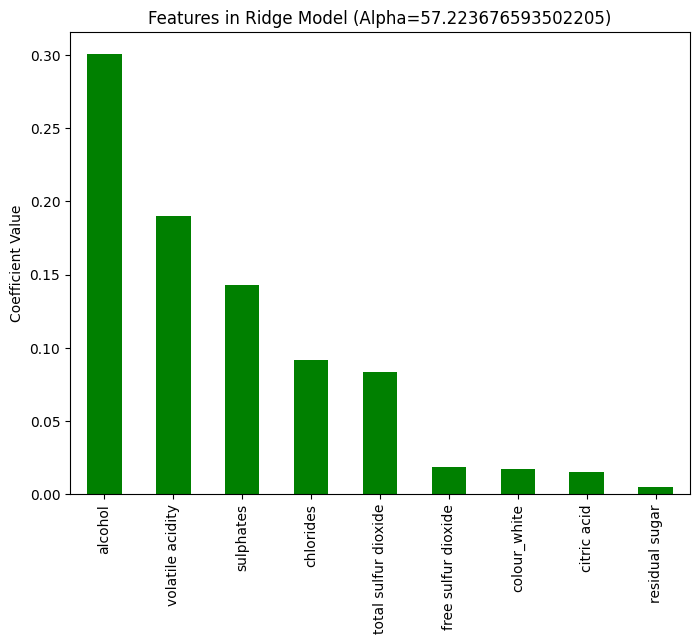

In [83]:
df_b=df_encoded.drop(columns=['density','pH','fixed acidity'])

numerical_features = df_b.select_dtypes(include=[np.number])

X = numerical_features # VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns # calculating VIF
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

# Define your features (X) and target (Y)
X = df_b

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
cols = X_train.columns
# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on the training data and transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Cross-validate, fit, and evaluate Lasso
cross_validate_and_fit(X_train, y_train, X_test, y_test, model_type='lasso')

# Cross-validate, fit, and evaluate Ridge
cross_validate_and_fit(X_train, y_train, X_test, y_test, model_type='ridge')

                feature       VIF
0      volatile acidity  5.412722
1           citric acid  3.039251
2        residual sugar  4.466727
3             chlorides  4.808249
4   free sulfur dioxide  5.717295
5  total sulfur dioxide  5.653978
Lasso - Best Alpha: 0.0021544346900318843
Lasso - Metrics:
Mean Absolute Error (MAE): 0.5717
Mean Squared Error (MSE): 0.5130
Root Mean Squared Error (RMSE): 0.7162
R² Score: 0.1982

Lasso Model Coefficients:
volatile acidity        0.255733
total sulfur dioxide    0.163422
chlorides               0.105355
citric acid             0.068657
free sulfur dioxide     0.056922
residual sugar          0.024566
colour_white            0.006827
dtype: float64


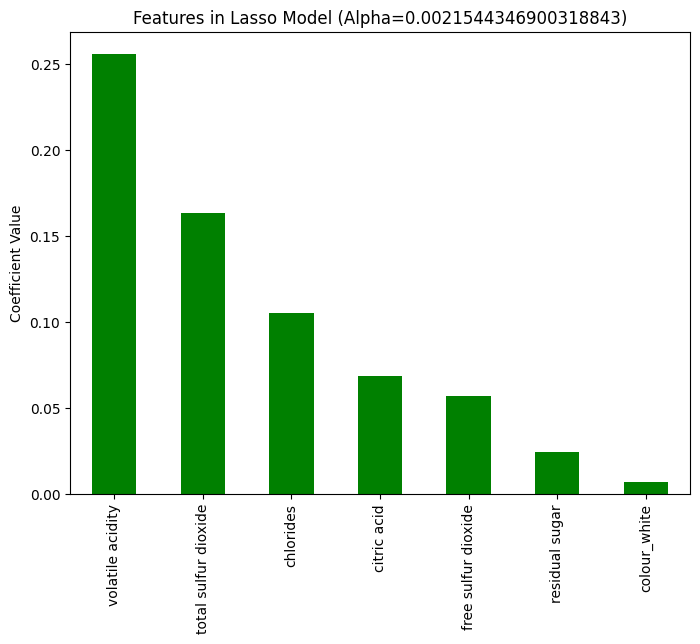

Ridge - Best Alpha: 43.287612810830616
Ridge - Metrics:
Mean Absolute Error (MAE): 0.5718
Mean Squared Error (MSE): 0.5131
Root Mean Squared Error (RMSE): 0.7163
R² Score: 0.1981

Lasso Model Coefficients:
volatile acidity        0.250848
total sulfur dioxide    0.164152
chlorides               0.106541
citric acid             0.072338
free sulfur dioxide     0.058576
residual sugar          0.025581
colour_white            0.008814
dtype: float64


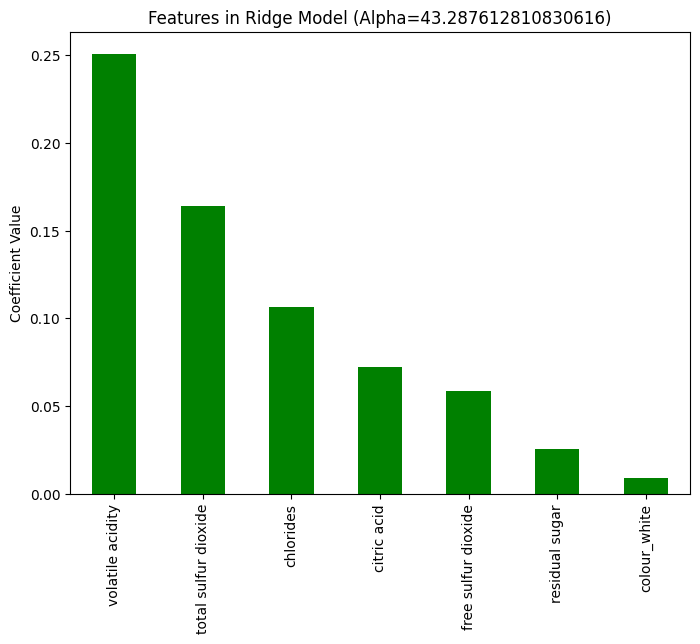

In [84]:
df_c=df_encoded.drop(columns=['density','pH','alcohol','fixed acidity','sulphates'])

numerical_features = df_c.select_dtypes(include=[np.number])

X = numerical_features # VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns # calculating VIF
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

# Define your features (X) and target (Y)
X = df_c

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
cols = X_train.columns
# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on the training data and transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Cross-validate, fit, and evaluate Lasso
cross_validate_and_fit(X_train, y_train, X_test, y_test, model_type='lasso')

# Cross-validate, fit, and evaluate Ridge
cross_validate_and_fit(X_train, y_train, X_test, y_test, model_type='ridge')

As we remove sulphates, our R-square decrease and MAE increase telling us that sulphates is an important predictor.




## Function for Robustness check

In [85]:
from sklearn.utils import resample
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

def robustness_check(model_type='lasso', X=None, y=None, alphas=None, n_iterations=20, test_size=0.3, random_state=42):
    """
    Function to perform robustness checks using bootstrapping or different splits.

    Parameters:
    model_type (str): 'lasso' for Lasso regression, 'ridge' for Ridge regression.
    X (DataFrame): Input features.
    y (Series): Target variable.
    alphas (array): Alpha values for hyperparameter tuning.
    n_iterations (int): Number of iterations for resampling.
    test_size (float): Proportion of data to include in the test split.
    random_state (int): Random seed for reproducibility.

    Returns:
    DataFrame: Summary of metrics across iterations (mean and standard deviation).
    """
    if X is None or y is None:
        raise ValueError("Both X and y need to be provided.")

    # Define alpha range if not provided
    if alphas is None:
        alphas = np.logspace(-4, 2, 100)

    # Initialize empty lists to store results
    results = {
        'MAE': [],
        'MSE': [],
        'RMSE': [],
        'R2': [],
    }

    # Define model based on input type
    if model_type == 'lasso':
        model = Lasso()
        model_name = 'Lasso'
    elif model_type == 'ridge':
        model = Ridge()
        model_name = 'Ridge'
    else:
        raise ValueError("model_type must be either 'lasso' or 'ridge'")

    for i in range(n_iterations):
        # Resample the data (Bootstrap or random splits)
        X_resampled, y_resampled = resample(X, y, n_samples=int((1-test_size) * len(X)), random_state=random_state+i)
        X_test, y_test = resample(X, y, n_samples=int(test_size * len(X)), random_state=random_state+i)

        # Cross-validate to find the best alpha
        from sklearn.model_selection import GridSearchCV
        model_cv = GridSearchCV(model, param_grid={'alpha': alphas}, cv=5)
        model_cv.fit(X_resampled, y_resampled)
        best_alpha = model_cv.best_params_['alpha']

        # Refit the model using the best alpha
        best_model = model.set_params(alpha=best_alpha)
        best_model.fit(X_resampled, y_resampled)

        # Predict on test set
        y_pred = best_model.predict(X_test)

        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Append metrics to results
        results['MAE'].append(mae)
        results['MSE'].append(mse)
        results['RMSE'].append(rmse)
        results['R2'].append(r2)

    # Convert results to DataFrame for summary
    results_df = pd.DataFrame(results)

    # Print summary statistics (mean and standard deviation)
    print(f'Robustness Check for {model_name} Model:')
    print('Mean and Standard Deviation of Metrics over {} iterations:'.format(n_iterations))
    print(results_df.agg(['mean', 'std']))

    return results_df

# Run robustness check for Lasso
robustness_results_lasso = robustness_check(model_type='lasso', X=df_encoded, y=y)

# Run robustness check for Ridge
robustness_results_ridge = robustness_check(model_type='ridge', X=df_encoded, y=y)


Robustness Check for Lasso Model:
Mean and Standard Deviation of Metrics over 20 iterations:
           MAE       MSE      RMSE        R2
mean  0.493586  0.406342  0.637283  0.369993
std   0.011144  0.018985  0.014936  0.028502
Robustness Check for Ridge Model:
Mean and Standard Deviation of Metrics over 20 iterations:
           MAE       MSE      RMSE        R2
mean  0.493426  0.406203  0.637176  0.370211
std   0.011140  0.018890  0.014866  0.028296


### Model without density

Lasso does nto change as it does not use that whereas we can see some change in values for ridge

In [86]:
# Run robustness check for Lasso
robustness_results_lasso = robustness_check(model_type='lasso', X=df_a, y=y)

# Run robustness check for Ridge
robustness_results_ridge = robustness_check(model_type='ridge', X=df_a, y=y)


Robustness Check for Lasso Model:
Mean and Standard Deviation of Metrics over 20 iterations:
           MAE       MSE      RMSE        R2
mean  0.493586  0.406342  0.637283  0.369993
std   0.011144  0.018985  0.014936  0.028502
Robustness Check for Ridge Model:
Mean and Standard Deviation of Metrics over 20 iterations:
           MAE       MSE      RMSE        R2
mean  0.493605  0.406383  0.637316  0.369930
std   0.011166  0.019002  0.014950  0.028499


In [87]:
# Run robustness check for Lasso
robustness_results_lasso = robustness_check(model_type='lasso', X=df_aa, y=y)

# Run robustness check for Ridge
robustness_results_ridge = robustness_check(model_type='ridge', X=df_aa, y=y)

Robustness Check for Lasso Model:
Mean and Standard Deviation of Metrics over 20 iterations:
           MAE       MSE      RMSE        R2
mean  0.493635  0.406416  0.637340  0.369887
std   0.011221  0.019113  0.015035  0.028486
Robustness Check for Ridge Model:
Mean and Standard Deviation of Metrics over 20 iterations:
           MAE       MSE      RMSE        R2
mean  0.493652  0.406470  0.637381  0.369807
std   0.011260  0.019146  0.015060  0.028480


In [88]:
# Run robustness check for Lasso
robustness_results_lasso = robustness_check(model_type='lasso', X=df_b, y=y)

# Run robustness check for Ridge
robustness_results_ridge = robustness_check(model_type='ridge', X=df_b, y=y)

Robustness Check for Lasso Model:
Mean and Standard Deviation of Metrics over 20 iterations:
           MAE       MSE      RMSE        R2
mean  0.495596  0.409803  0.639977  0.364685
std   0.011447  0.019979  0.015635  0.028744
Robustness Check for Ridge Model:
Mean and Standard Deviation of Metrics over 20 iterations:
           MAE       MSE      RMSE        R2
mean  0.495586  0.409801  0.639975  0.364690
std   0.011459  0.020025  0.015670  0.028785


## Modelling using each predictor

In [89]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

def fit_lasso_ridge_one_feature(X, y, alphas=None, random_state=42):
    """
    Fits Lasso and Ridge models on each feature separately and displays evaluation metrics.

    Parameters:
    X (DataFrame): Input features.
    y (Series): Target variable.
    alphas (array): Alpha values for hyperparameter tuning.
    random_state (int): Random seed for reproducibility.

    Returns:
    DataFrame: Summary of metrics for each feature.
    """
    if alphas is None:
        alphas = np.logspace(-4, 2, 100)  # Default range for alpha values

    results = {
        'Feature': [],
        'Model': [],
        'Alpha': [],
        'MAE': [],
        'MSE': [],
        'RMSE': [],
        'R2': []
    }

    # Loop through each feature in the dataset
    for feature in X.columns:
        X_feature = X[[feature]]  # Select only the current feature

        # Fit Lasso model with the current feature
        lasso = LassoCV(alphas=alphas, random_state=random_state, cv=5)
        lasso.fit(X_feature, y)
        lasso_y_pred = lasso.predict(X_feature)

        # Calculate metrics for Lasso
        lasso_mae = mean_absolute_error(y, lasso_y_pred)
        lasso_mse = mean_squared_error(y, lasso_y_pred)
        lasso_rmse = np.sqrt(lasso_mse)
        lasso_r2 = r2_score(y, lasso_y_pred)

        # Store Lasso results
        results['Feature'].append(feature)
        results['Model'].append('Lasso')
        results['Alpha'].append(lasso.alpha_)
        results['MAE'].append(lasso_mae)
        results['MSE'].append(lasso_mse)
        results['RMSE'].append(lasso_rmse)
        results['R2'].append(lasso_r2)

        # Fit Ridge model with the current feature
        ridge = RidgeCV(alphas=alphas, cv=5)
        ridge.fit(X_feature, y)
        ridge_y_pred = ridge.predict(X_feature)

        # Calculate metrics for Ridge
        ridge_mae = mean_absolute_error(y, ridge_y_pred)
        ridge_mse = mean_squared_error(y, ridge_y_pred)
        ridge_rmse = np.sqrt(ridge_mse)
        ridge_r2 = r2_score(y, ridge_y_pred)

        # Store Ridge results
        results['Feature'].append(feature)
        results['Model'].append('Ridge')
        results['Alpha'].append(ridge.alpha_)
        results['MAE'].append(ridge_mae)
        results['MSE'].append(ridge_mse)
        results['RMSE'].append(ridge_rmse)
        results['R2'].append(ridge_r2)

    # Convert results to DataFrame for better visualization
    results_df = pd.DataFrame(results)

    return results_df


# Run the function to fit Lasso and Ridge models on each feature
results_df = fit_lasso_ridge_one_feature(X, y)

# Show the results
display(results_df)


,Feature,Model,Alpha,MAE,MSE,RMSE,R2
0,volatile acidity,Lasso,0.000100,0.600055,0.552344,0.743199,0.152535
1,volatile acidity,Ridge,0.000100,0.600016,0.552344,0.743198,0.152535
2,citric acid,Lasso,0.001072,0.655450,0.618392,0.786379,0.051198
3,citric acid,Ridge,5.336699,0.655726,0.618421,0.786397,0.051153
4,residual sugar,Lasso,100.000000,0.683178,0.651761,0.807317,0.000000
5,residual sugar,Ridge,100.000000,0.683201,0.651638,0.807241,0.000189
6,chlorides,Lasso,0.000231,0.673688,0.640954,0.800596,0.016580
7,chlorides,Ridge,0.572237,0.673755,0.640991,0.800619,0.016524
8,free sulfur dioxide,Lasso,0.011498,0.680726,0.650089,0.806281,0.002564
9,free sulfur dioxide,Ridge,100.000000,0.680659,0.650088,0.806280,0.002566


In [91]:
!cp "/content/drive/MyDrive/Colab Notebooks/PenalizedRegression.ipynb" ./
!jupyter nbconvert --to html "PenalizedRegression.ipynb"

[NbConvertApp] Converting notebook PenalizedRegression.ipynb to html
[NbConvertApp] Writing 1643900 bytes to PenalizedRegression.html
